##Importing Libraries and Datasets

In [1]:
# 1. Imports and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_sentiment = pd.read_csv('fear_greed_index.csv')
df_trades = pd.read_csv('historical_data.csv')

In [2]:
df_trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
df_trades.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [4]:
df_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
df_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
df_sentiment.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [7]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


# Data Preprocessing

In [8]:
# 2. Preprocessing and Data Alignment

# Convert date columns to datetime
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Map each trade to the prevailing sentiment by date
df_trades['trade_date'] = df_trades['Timestamp IST'].dt.date
df_sentiment['date_only'] = df_sentiment['date'].dt.date

# Merge on date
df_merged = pd.merge(df_trades, df_sentiment, left_on='trade_date', right_on='date_only', how='left')

# Fill missing sentiment with 'Unknown'
df_merged['classification'] = df_merged['classification'].fillna('Unknown')

In [9]:
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date,date_only
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02


In [10]:
df_merged.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [11]:
df_merged['classification'].isnull().sum()

np.int64(0)

In [12]:
df_merged['classification'].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400
Unknown,6


In [13]:
df_merged.shape

(211224, 22)

Since the count for Unknown sentiment is less , we can remove those columns .

In [14]:
df_merged = df_merged[df_merged['classification'] != 'Unknown']

In [15]:
df_merged.shape

(211218, 22)

In [16]:
df_merged['classification'].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


## Feature Engineering

In [27]:
# 3. Advanced Feature Engineering

# Convert numeric columns
for col in ['Closed PnL', 'Execution Price', 'Size USD', 'Size Tokens', 'Fee']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

# Add trade direction as +1 (BUY) or -1 (SELL)
df_merged['side_num'] = df_merged['Side'].map({'BUY': 1, 'SELL': -1})

# Calculate rolling Sharpe ratio per trader (window=10 trades)
def rolling_sharpe(x, window=10):
    returns = x['Closed PnL']
    if len(returns) < window:
        return np.nan
    rolling = returns.rolling(window)
    return (rolling.mean() / rolling.std()).iloc[-1]

df_merged['rolling_sharpe'] = (
    df_merged.groupby('Account')
    .apply(lambda x: x['Closed PnL'].rolling(10).mean() / x['Closed PnL'].rolling(10).std())
    .reset_index(level=0, drop=True)
)

<ipython-input-27-81bf40886292>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Closed PnL'].rolling(10).mean() / x['Closed PnL'].rolling(10).std())


In [28]:


# Calculate profit factor
def profit_factor(x):
    gains = x[x > 0].sum()
    losses = -x[x < 0].sum()
    return gains / losses if losses != 0 else np.nan

# Calculate ROI per trade
df_merged['ROI'] = df_merged['Closed PnL'] / (df_merged['Execution Price'] * df_merged['Size Tokens']).replace(0, np.nan)

# Aggregate performance metrics per trader per sentiment regime
performance = (
    df_merged.groupby(['Account', 'classification'])
    .agg(
        total_pnl=('Closed PnL', 'sum'),
        num_trades=('Closed PnL', 'count'),
        avg_trade_size=('Size USD', 'mean'),
        winrate=('Closed PnL', lambda x: (x > 0).mean()),
        max_drawdown=('Closed PnL', 'min'),
        profit_factor=('Closed PnL', profit_factor),
        avg_rolling_sharpe=('rolling_sharpe', 'mean'),
        trading_frequency=('Timestamp IST', lambda x: x.nunique()),
        avg_roi=('ROI', 'mean')
    )
    .reset_index()
)

<ipython-input-18-368f971cfdc6>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=performance, x='classification', y='total_pnl', estimator=np.mean, ci=None)


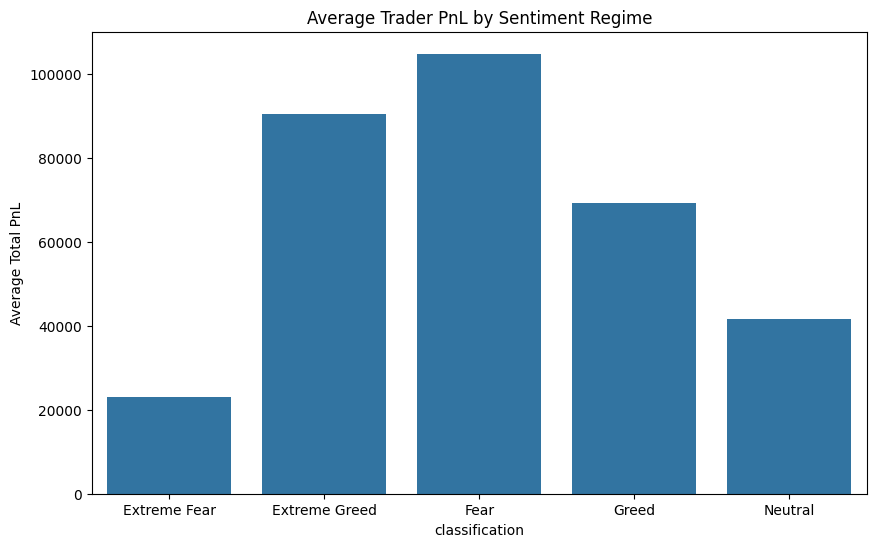

In [18]:
# 4. Analyze Trader Performance in Different Sentiment Regimes

# Pivot for easy comparison
pivot_pnl = performance.pivot(index='Account', columns='classification', values='total_pnl')

# Visualize average PnL by sentiment regime
plt.figure(figsize=(10,6))
sns.barplot(data=performance, x='classification', y='total_pnl', estimator=np.mean, ci=None)
plt.title('Average Trader PnL by Sentiment Regime')
plt.ylabel('Average Total PnL')
plt.show()

In [19]:
# 5. Identify Elite and Contrarian Traders

# Elite: Top 10 by PnL in each regime
elite_traders = {}
for regime in df_sentiment['classification'].unique():
    top = performance[performance['classification'] == regime].sort_values('total_pnl', ascending=False).head(10)
    elite_traders[regime] = top

# Contrarian: Top 10 in 'Extreme Fear' and 'Extreme Greed'
contrarian = pd.concat([
    performance[performance['classification'] == 'Extreme Fear'].sort_values('total_pnl', ascending=False).head(10),
    performance[performance['classification'] == 'Extreme Greed'].sort_values('total_pnl', ascending=False).head(10)
])

Correlation between sentiment value and average daily PnL: 0.04


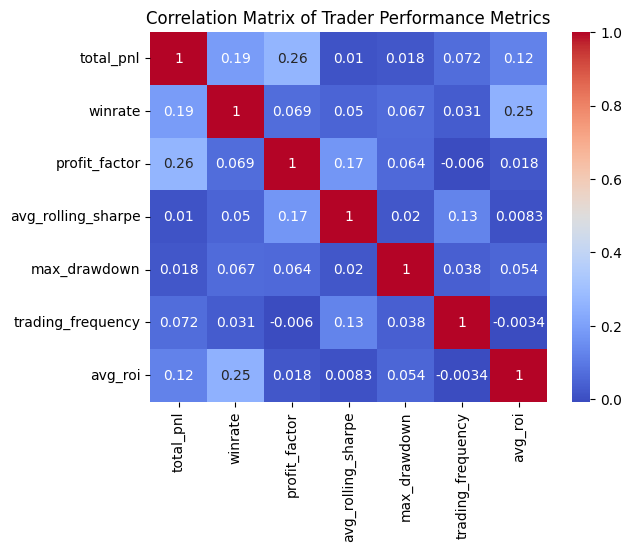

In [20]:
# 6. Correlation Analysis: Sentiment vs. Trading Outcomes

# Daily average PnL vs. sentiment value
daily_pnl = df_merged.groupby('date_only').agg(avg_pnl=('Closed PnL', 'mean')).reset_index()
daily_sentiment = df_sentiment[['date_only', 'value']]
corr_df = pd.merge(daily_pnl, daily_sentiment, on='date_only')
correlation = corr_df['avg_pnl'].corr(corr_df['value'])
print(f"Correlation between sentiment value and average daily PnL: {correlation:.2f}")

# Correlation matrix for all advanced metrics
metrics = ['total_pnl', 'winrate', 'profit_factor', 'avg_rolling_sharpe', 'max_drawdown', 'trading_frequency', 'avg_roi']
corr_matrix = performance[metrics].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Trader Performance Metrics')
plt.show()

In [21]:
# 7. Generate Ranked Lists of Traders by Sentiment Regime

performance['rank'] = performance.groupby('classification')['total_pnl'].rank(ascending=False)

# Show top 5 traders for each regime
for regime, df in elite_traders.items():
    print(f"\nTop 5 traders during {regime}:")
    display(df[['Account', 'total_pnl', 'num_trades', 'winrate', 'profit_factor', 'avg_rolling_sharpe', 'avg_roi']].head(5))


Top 5 traders during Fear:


,Account,total_pnl,num_trades,winrate,profit_factor,avg_rolling_sharpe,avg_roi
2,0x083384f897ee0f19899168e3b1bec365f52a9012,1.113374e+06,1778,0.526434,14.934588,2.172981,0.053921
143,0xbaaaf6571ab7d571043ff1e313a9609a10637864,6.208724e+05,12437,0.498271,18000.053822,inf,0.016197
67,0x513b8629fe877bb581bf244e326a047b249c4ff1,3.671662e+05,5981,0.370507,8.694731,NaN,0.001770
57,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,2.967817e+05,1396,0.409026,376.056744,0.742799,0.021723
148,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,2.367977e+05,1181,0.498730,3.561441,inf,0.082437



Top 5 traders during Extreme Fear:


,Account,total_pnl,num_trades,winrate,profit_factor,avg_rolling_sharpe,avg_roi
142,0xbaaaf6571ab7d571043ff1e313a9609a10637864,261917.977792,4480,0.379464,NaN,inf,0.012700
80,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,198900.561610,221,0.420814,15.051890,-5.239946,0.094153
55,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,166696.399486,986,0.309331,409.457891,0.732398,0.013623
0,0x083384f897ee0f19899168e3b1bec365f52a9012,124769.221441,100,0.370000,NaN,1.192144,0.052553
60,0x4f93fead39b70a1824f981a54d4e55b278e9f760,74346.546606,371,0.428571,NaN,0.694422,0.007296



Top 5 traders during Neutral:


,Account,total_pnl,num_trades,winrate,profit_factor,avg_rolling_sharpe,avg_roi
138,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,401309.434693,3457,0.378073,32.149505,inf,0.035588
69,0x513b8629fe877bb581bf244e326a047b249c4ff1,381330.494050,2517,0.554231,13.221549,inf,0.042129
4,0x083384f897ee0f19899168e3b1bec365f52a9012,125650.116740,421,0.581948,NaN,2.279585,0.017256
59,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,97380.090931,672,0.752976,NaN,0.767366,0.021274
44,0x420ab45e0bd8863569a5efbb9c05d91f40624641,74293.663505,48,0.520833,NaN,0.824147,0.620525



Top 5 traders during Greed:


,Account,total_pnl,num_trades,winrate,profit_factor,avg_rolling_sharpe,avg_roi
137,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,534058.236330,5889,0.273221,20.237078,inf,0.040572
78,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,453595.318176,593,0.317032,74.755336,0.290097,0.042363
3,0x083384f897ee0f19899168e3b1bec365f52a9012,276719.270187,574,0.160279,2.400052,0.108015,0.030677
154,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,243399.513140,7338,0.464704,2.993957,1.225907,0.019938
48,0x430f09841d65beb3f27765503d0f850b8bce7713,227680.491734,772,0.637306,NaN,0.971388,0.180604



Top 5 traders during Extreme Greed:


,Account,total_pnl,num_trades,winrate,profit_factor,avg_rolling_sharpe,avg_roi
135,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.105305e+06,1643,0.510043,141.697615,0.640437,0.304508
152,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,4.788115e+05,6723,0.596311,18.540813,0.537170,0.035275
86,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,2.107269e+05,3831,0.854607,26.693251,inf,0.030454
61,0x4f93fead39b70a1824f981a54d4e55b278e9f760,1.292177e+05,2446,0.333606,15.997510,0.508739,0.002577
46,0x430f09841d65beb3f27765503d0f850b8bce7713,1.242849e+05,15,1.000000,NaN,0.828230,0.999997


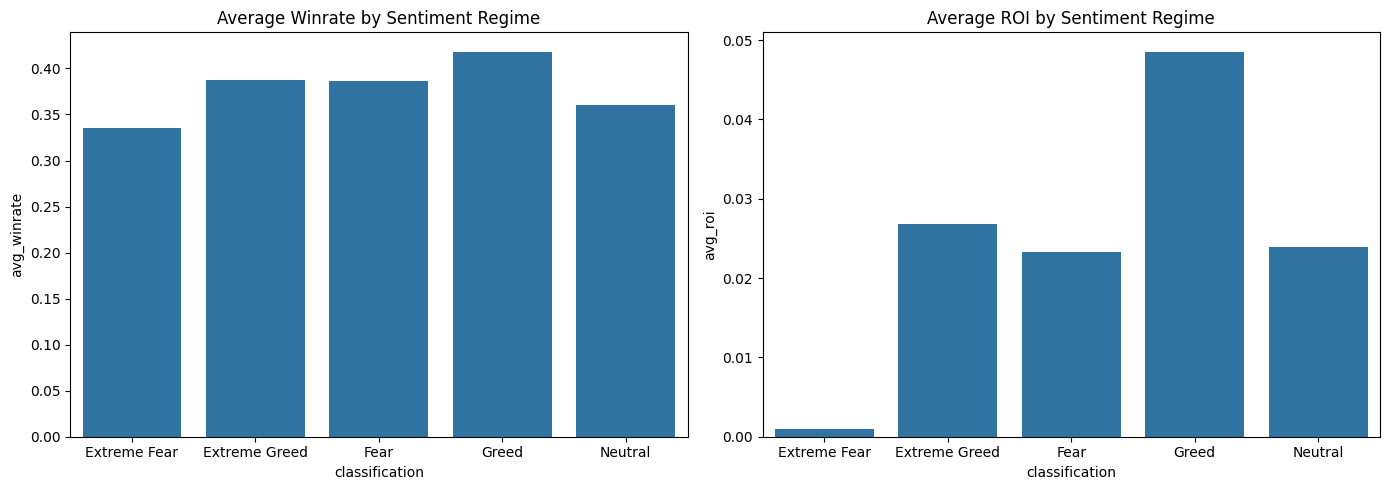

In [26]:
# 8. Well-Structured Reporting: Summary Table and Dashboard


# Dashboard: Visualize winrate and ROI by regime
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data=summary, x='classification', y='avg_winrate', ax=axes[0])
axes[0].set_title('Average Winrate by Sentiment Regime')
sns.barplot(data=summary, x='classification', y='avg_roi', ax=axes[1])
axes[1].set_title('Average ROI by Sentiment Regime')
plt.tight_layout()
plt.show()

In [25]:
# Summary Table
summary = performance.groupby('classification').agg(
    avg_pnl=('total_pnl', 'mean'),
    avg_winrate=('winrate', 'mean'),
    avg_profit_factor=('profit_factor', 'mean'),
    avg_sharpe=('avg_rolling_sharpe', 'mean'),
    avg_drawdown=('max_drawdown', 'mean'),
    avg_trading_freq=('trading_frequency', 'mean'),
    avg_roi=('avg_roi', 'mean')
).reset_index()
print("Summary of Trader Performance by Sentiment Regime:")
display(summary)


Summary of Trader Performance by Sentiment Regime:


,classification,avg_pnl,avg_winrate,avg_profit_factor,avg_sharpe,avg_drawdown,avg_trading_freq,avg_roi
0,Extreme Fear,23097.195265,0.335185,249.757345,NaN,-3259.898677,58.875000,0.000999
1,Extreme Greed,90505.710356,0.387735,24.382352,inf,-1376.762192,312.600000,0.026788
2,Fear,104911.107551,0.386290,715.224051,NaN,-4740.214269,177.000000,0.023346
3,Greed,69359.008805,0.418324,187.185213,NaN,-9656.789475,274.580645,0.048563
4,Neutral,41707.118566,0.360694,5.603211,inf,-2459.346248,147.161290,0.023928


## Visualization for Top Performing Traders during various scenarios

Here,for simplicity, I have taken last 5 characters of the Account name to represent the trader's Account .

<ipython-input-24-8c7376a40925>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Account_short', y='total_pnl', palette='viridis')


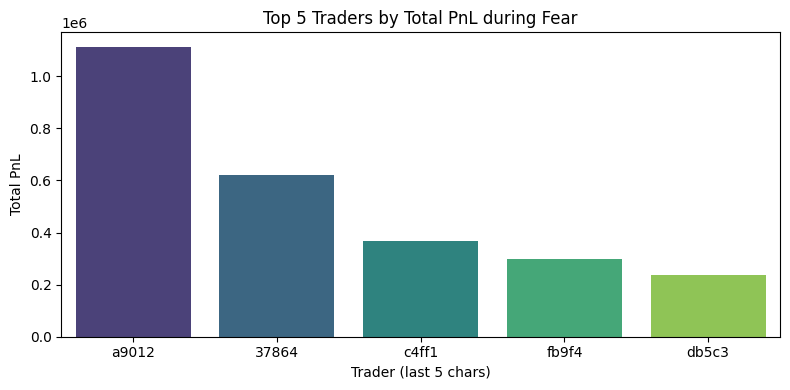

<ipython-input-24-8c7376a40925>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Account_short', y='total_pnl', palette='viridis')


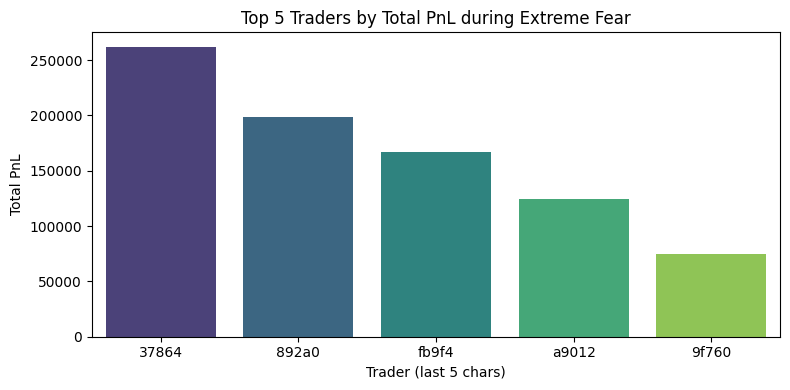

<ipython-input-24-8c7376a40925>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Account_short', y='total_pnl', palette='viridis')


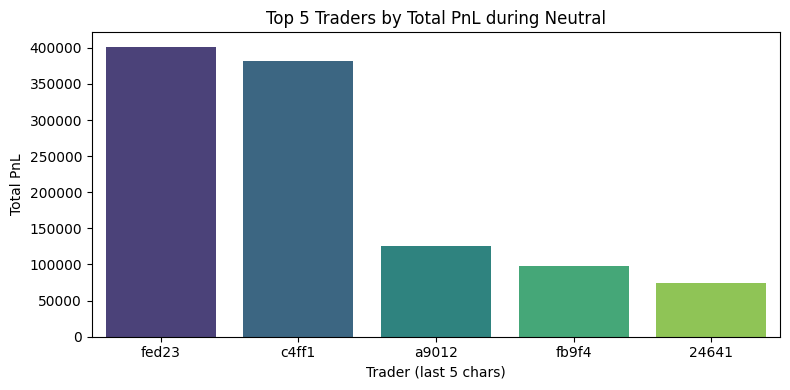

<ipython-input-24-8c7376a40925>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Account_short', y='total_pnl', palette='viridis')


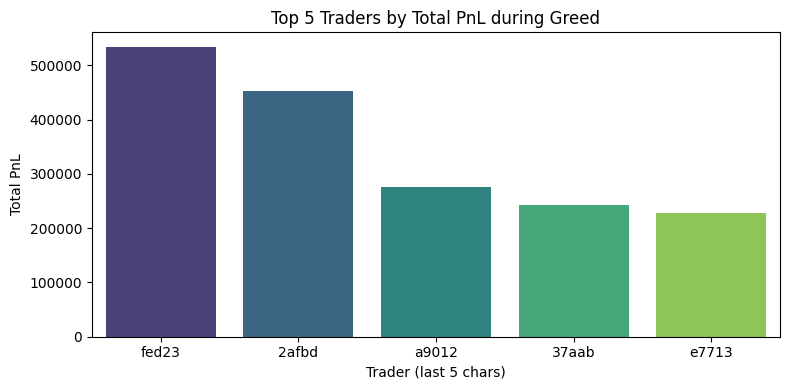

<ipython-input-24-8c7376a40925>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Account_short', y='total_pnl', palette='viridis')


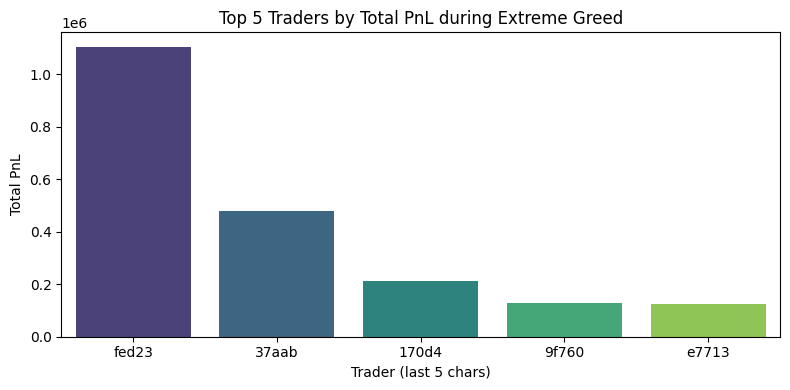

In [24]:
# Visualization: Top 5 Traders by Total PnL for Each Sentiment Regime (Account = last 5 chars)

for regime, df in elite_traders.items():
    top5 = df.head(5).copy()
    # Add a column for short account labels
    top5['Account_short'] = top5['Account'].apply(lambda x: str(x)[-5:])
    plt.figure(figsize=(8, 4))
    sns.barplot(data=top5, x='Account_short', y='total_pnl', palette='viridis')
    plt.title(f'Top 5 Traders by Total PnL during {regime}')
    plt.ylabel('Total PnL')
    plt.xlabel('Trader (last 5 chars)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()